# Introdução à Estatística (Case Prático)
***

<img src="https://selecao.letscode.com.br/favicon.png" width="40px" height="40px" style="position: absolute; top: 12px; right: 20px;" />

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

## Variáveis utilizadas

### Renda

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

### Idade

Idade do morador na data de referência em anos.

### Altura (elaboração própria)

Altura do morador em metros.

### UF

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

### Sexo

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

### Anos de Estudo

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

### Cor

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Importando as bibliotecas e lendo o dataset

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [32]:
df = pd.read_csv('../../data/pnad-2015.csv')

df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## <font color=green>1. Tipos de dados</font>
***

### Variáveis qualitativas ordinais

► Variáveis que podem ser ordenadas ou hierarquizardas

- Anos de Estudo

### Variáveis qualitativas nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas

- UF
- Sexo
- Cor

### Variáveis quantitativas discretas

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

- Idade

### Variáveis quantitativas contínuas

► Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais).

- Renda
- Altura

## <font color=green>2. Distribuição de frequências</font>
***

O primeiro passo em um trabalho de análise é o conhecimento do comportamento das variáveis envolvidas no estudo. Utilizando técnicas estatísticas como as análises das <b>DISTRIBUIÇÕES DE FREQUÊNCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

## <font color=green>2.1 Distribuição de frequências para variáveis qualitativas</font>
***

### Obtenha a tabela e o gráfico de distribuição de frequências para a variável sexo

In [33]:
df['Sexo'] = df.apply(
    lambda row: 'Masculino' if row['Sexo'] == 0 else 'Feminino',
    axis = 1
)

In [34]:
fi = df.Sexo.value_counts()

fi

Masculino    53250
Feminino     23590
Name: Sexo, dtype: int64

In [35]:
fp = df.Sexo.value_counts(True) * 100

fp

Masculino    69.299844
Feminino     30.700156
Name: Sexo, dtype: float64

In [36]:
df_frequencies = pd.DataFrame(
    {
        'Frequência Absoluta': fi,
        'Frequência Percentual (%)': fp
    }
).rename_axis('Sexo')

df_frequencies

,Frequência Absoluta,Frequência Percentual (%)
Sexo,,
Masculino,53250,69.299844
Feminino,23590,30.700156


In [37]:
fig = px.histogram(
    df_frequencies,
    x = df_frequencies.index,
    y = 'Frequência Absoluta',
    title = 'Gráfico de distribuição da frequência absoluta do sexo'
)

fig.update_layout(
    yaxis_title = 'Frequência Absoluta'
)

fig.show()

In [38]:
fig = px.histogram(
    df_frequencies,
    x = df_frequencies.index,
    y = 'Frequência Percentual (%)',
    title = 'Gráfico de distribuição da frequência percentual do sexo'
)

fig.update_layout(
    yaxis_title = 'Frequência percentual'
)

fig.show()

In [39]:
colors = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}

data = df.copy()[['Sexo']]

data['Cor'] = df.apply(
    lambda row: colors[row['Cor']],
    axis = 1
)

### Obtenha a tabela e o gráfico de distribuição de frequências para a variável Sexo cruzada com os dados de Cor

In [40]:
frequencies = data.value_counts()

frequencies = frequencies.reset_index()

frequencies.columns = ['Sexo', 'Cor', 'Frequência absoluta']
                       
total = frequencies.sum()['Frequência absoluta']

frequencies['Frequência percentual'] = frequencies.apply(
    lambda row: row['Frequência absoluta'] / total * 100,
    axis = 1
)

frequencies

,Sexo,Cor,Frequência absoluta,Frequência percentual
0,Masculino,Parda,25063,32.617126
1,Masculino,Branca,22194,28.883394
2,Feminino,Parda,10862,14.135867
3,Feminino,Branca,9621,12.520822
4,Masculino,Preta,5502,7.160333
5,Feminino,Preta,2889,3.759761
6,Masculino,Indígena,256,0.333160
7,Masculino,Amarela,235,0.305830
8,Feminino,Amarela,117,0.152264
9,Feminino,Indígena,101,0.131442


In [41]:
fig = px.histogram(
    frequencies,
    color = 'Sexo',
    x = 'Cor',
    y = 'Frequência absoluta',
    barmode = 'group',
    title = 'Gráfico de distribuição da frequência absoluta do sexo pela cor'
)

fig.update_layout(
    yaxis_title = 'Frequência absoluta'
)

fig.show()

In [42]:
fig = px.histogram(
    frequencies,
    color = 'Sexo',
    x = 'Cor',
    y = 'Frequência percentual',
    barmode = 'group',
    title = 'Gráfico de distribuição da frequência percentual do sexo pela cor'
)

fig.update_layout(
    yaxis_title = 'Frequência absoluta'
)

fig.show()

## <font color=green>2.2 Distribuição de frequências para variáveis quantitativas (classes personalizadas)</font>
***

### Passo 1 - Especificar os limites de cada classe

Utilizar a seguinte classificação:

<b>A</b> ► Acima de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso, <b>R$ 788,00</b> (considerando o ano de 2015):

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576


#### 1. Criar um dataframe que contenha essas classes personalizadas, utilizando o `pd.cut`.

In [43]:
df_salaries = df.copy()

df_salaries

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,Masculino,23,8,12,800,1.603808
1,11,Feminino,23,2,12,1150,1.739790
2,11,Feminino,35,8,15,880,1.760444
3,11,Masculino,46,2,6,3500,1.783158
4,11,Feminino,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,Feminino,46,2,11,812,1.687030
76836,53,Masculino,30,4,7,1500,1.792934
76837,53,Masculino,32,8,12,1300,1.830587
76838,53,Masculino,57,8,4,1500,1.726344


In [44]:
labels = [ 'A', 'B', 'C', 'D', 'E']

df_salaries['Classe'] = pd.cut(
    df_salaries['Renda'],
    bins = [
        0,
        1576,
        3152,
        7880,
        15760,
        df_salaries['Renda'].max()
    ],
    include_lowest = True,
    labels = labels
)

df_salaries

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe
0,11,Masculino,23,8,12,800,1.603808,A
1,11,Feminino,23,2,12,1150,1.739790,A
2,11,Feminino,35,8,15,880,1.760444,A
3,11,Masculino,46,2,6,3500,1.783158,C
4,11,Feminino,47,8,9,150,1.690631,A
...,...,...,...,...,...,...,...,...
76835,53,Feminino,46,2,11,812,1.687030,A
76836,53,Masculino,30,4,7,1500,1.792934,A
76837,53,Masculino,32,8,12,1300,1.830587,A
76838,53,Masculino,57,8,4,1500,1.726344,A


#### 2. Criar a tabela de distribuição de frequências do dataframe obtido acima.

In [45]:
fi = df_salaries['Classe'].value_counts()

fi

A    49755
B    16700
C     7599
D     2178
E      608
Name: Classe, dtype: int64

In [46]:
fp = df_salaries['Classe'].value_counts(True) * 100

fp

A    64.751432
B    21.733472
C     9.889381
D     2.834461
E     0.791255
Name: Classe, dtype: float64

In [47]:
fig = px.histogram(
    fi,
    x = fi.index,
    y = fi,
    title = 'Gráfico de distribuição da frequência absoluta das classes econômicas'
)

fig.update_layout(
    yaxis_title = 'Frequência absoluta'
)

fig.show()

In [48]:
fig = px.histogram(
    fp,
    x = fp.index,
    y = fp,
    title = 'Gráfico de distribuição da frequência percentual das classes econômicas'
)

fig.update_layout(
    yaxis_title = 'Frequência percentual'
)

fig.show()

## <font color=green>2.3 Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)</font>
***

Obtenha a tabela e o gráfico de distribuições de frequências da variável de renda, mas, dessa vez, utilizando a Regra de Sturges para definir as classes de amplitude fixa.

#### 1. Definindo o número de classes e criando o dataframe com as classes

#### Regra de Sturges

$$k = 1 + \frac{10}{3}\log_{10}n$$

In [49]:
n = df.shape[0]

k = 1 + (10/3) * np.log10(n)

k = round(k)

k

17

In [50]:
labels = [
    'A', 'B', 'C', 'D', 'E',
    'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O',
    'P', 'Q',
]

df_salaries_sturges = df.copy()

df_salaries_sturges['Classe'] = pd.cut(
    df_salaries_sturges['Renda'],
    bins = k,
    include_lowest = True,
    labels = labels
)

df_salaries_sturges

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe
0,11,Masculino,23,8,12,800,1.603808,A
1,11,Feminino,23,2,12,1150,1.739790,A
2,11,Feminino,35,8,15,880,1.760444,A
3,11,Masculino,46,2,6,3500,1.783158,A
4,11,Feminino,47,8,9,150,1.690631,A
...,...,...,...,...,...,...,...,...
76835,53,Feminino,46,2,11,812,1.687030,A
76836,53,Masculino,30,4,7,1500,1.792934,A
76837,53,Masculino,32,8,12,1300,1.830587,A
76838,53,Masculino,57,8,4,1500,1.726344,A


#### 2. Criando a tabela e o gráfico de distribução de frequências

In [51]:
fi = df_salaries_sturges['Classe'].value_counts()

fi

A    75594
B     1022
C      169
D       19
E       16
I        6
F        5
G        4
Q        3
H        1
K        1
J        0
L        0
M        0
N        0
O        0
P        0
Name: Classe, dtype: int64

In [52]:
fp = df_salaries_sturges['Classe'].value_counts(True) * 100

fp

A    98.378449
B     1.330036
C     0.219938
D     0.024727
E     0.020822
I     0.007808
F     0.006507
G     0.005206
Q     0.003904
H     0.001301
K     0.001301
J     0.000000
L     0.000000
M     0.000000
N     0.000000
O     0.000000
P     0.000000
Name: Classe, dtype: float64

In [53]:
df_salaries_sturges_frequencies = pd.DataFrame(
    {
        'Frequência absoluta': fi,
        'Frequência relativa': fp
    }
).rename_axis('Classes')

df_salaries_sturges_frequencies

,Frequência absoluta,Frequência relativa
Classes,,
A,75594,98.378449
B,1022,1.330036
C,169,0.219938
D,19,0.024727
E,16,0.020822
I,6,0.007808
F,5,0.006507
G,4,0.005206
Q,3,0.003904


In [54]:
fig = px.histogram(
    df_salaries_sturges_frequencies,
    x = 'Frequência absoluta',
    y = df_salaries_sturges_frequencies.index,
    title = 'Gráfico de distribuição da frequência absoluta das classes econômicas'
)

fig.update_layout(
    xaxis_title = 'Frequência absoluta',
    yaxis_title = 'Classes'
)

fig.show()

In [55]:
fig = px.histogram(
    df_salaries_sturges_frequencies,
    x = 'Frequência relativa',
    y = df_salaries_sturges_frequencies.index,
    title = 'Gráfico de distribuição da frequência relativa das classes econômicas'
)

fig.update_layout(
    xaxis_title = 'Frequência relativa',
    yaxis_title = 'Classes'
)

fig.show()

## 3. Medidas de Tendência Central</font>
***

#### 3.1 Média aritmética

Calcule a média aritmética das variáveis `Anos de Estudo`, `Idade`, `Renda` e `Altura`.

In [56]:
df['Anos de Estudo'].mean()

9.469664237376367

In [57]:
df['Anos de Estudo'] = df['Anos de Estudo'] - 1

In [58]:
df['Anos de Estudo'].unique()

array([11, 14,  5,  8, 13, 15,  9,  0,  4,  6,  2,  1,  3,  7, 10, 16, 12],
      dtype=int64)

In [59]:
# 1	Sem instrução e menos de 1 ano
# 2	1 ano
# 3	2 anos
# 4	3 anos
# 5	4 anos
# 6	5 anos
# 7	6 anos
# 8	7 anos
# 9	8 anos
# 10	9 anos
# 11	10 anos
# 12	11 anos
# 13	12 anos
# 14	13 anos
# 15	14 anos
# 16	15 anos ou mais
# 17	Não determinados
# Não aplicável

In [60]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,Masculino,23,8,11,800,1.603808
1,11,Feminino,23,2,11,1150,1.739790
2,11,Feminino,35,8,14,880,1.760444
3,11,Masculino,46,2,5,3500,1.783158
4,11,Feminino,47,8,8,150,1.690631


In [61]:
averages = {
    'Média de idade': [df['Idade'].mean()],
    'Média de renda': [df['Renda'].mean()],
    'Média de altura': [df['Altura'].mean()]
}

pd.DataFrame(averages)

,Média de idade,Média de renda,Média de altura
0,44.071421,2000.383199,1.699512


#### 3.2 Mediana

Calcule a mediana das variáveis `Anos de Estudo`, `Idade`, `Renda` e `Altura`.

In [62]:
medians = {
    'Mediana de idade': [df['Idade'].median()],
    'Mediana de renda': [df['Renda'].median()],
    'Mediana de altura': [df['Altura'].median()]
}

pd.DataFrame(medians)

,Mediana de idade,Mediana de renda,Mediana de altura
0,43.0,1200.0,1.699325


#### 3.3. Moda

Calcule a moda daquelas variáveis para as quais você imagina que faz sentido obter essa informação (com base no que vimos na aula).

In [63]:
df['Altura'].mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

In [64]:
df['Renda'].mode()

0    788
dtype: int64

In [65]:
df['Idade'].mode()

0    40
dtype: int64

## <font color=green>3.4 Relação entre média, mediana e moda</font>
***

Como fizemos durante a aula, avalie a relação entre a média, mediana e moda de algumas variáveis do seu conjunto de dados.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

### Avalie a variável `Renda`

In [208]:
data = [
    df.Renda.mean(),
    df.Renda.median(),
    df.Renda.mode()[0]
]

data = pd.DataFrame(
    data,
    index = ['Média', 'Mediana', 'Moda'],
    columns = ['Métricas']
)

fig = px.line(
    data,
    y = 'Métricas',
    x = data.index,
    title = 'Análise da renda (assimetria à direita)'
)

fig.update_xaxes(title = 'Métricas')

fig.update_yaxes(title = 'Valores')

fig.show()

***

### Avalie a variável `Altura`

In [211]:
data = [
    df.Altura.mean(),
    df.Altura.median(),
    df.Altura.mode()[0]
]

data = pd.DataFrame(
    data,
    index = ['Média', 'Mediana', 'Moda'],
    columns = ['Métricas']
)

fig = px.line(
    data,
    y = 'Métricas',
    x = data.index,
    title = 'Análise da altura (assimetria à direita)'
)

fig.update_xaxes(title = 'Métricas')

fig.update_yaxes(title = 'Valores')

fig.show()

***

### Avalie a variável `Anos de estudo`

## 4. Medidas Separatrizes
***

### 4.1 Quartis, decis e percentis

Calcule os quartis, decis e percentis para a variável `Renda`.

In [66]:
quartis = df.Renda.quantile([0.25, 0.5, 0.75])

quartis

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [67]:
decis = df.Renda.quantile([i/10 for i in range(1, 10)])

decis

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [68]:
percentis = df.Renda.quantile([i/100 for i in range(1, 100)])

percentis

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

### 4.2 Boxplot

Crie o boxplot para as variáveis `Renda`, `Altura`.

<AxesSubplot:xlabel='Renda'>

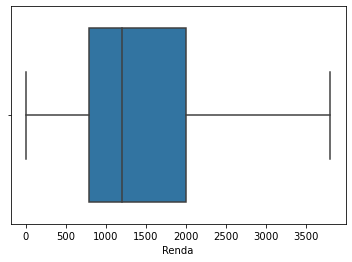

In [69]:
sns.boxplot(
    data = df,
    x = 'Renda',
    showfliers = False
)

<AxesSubplot:xlabel='Altura'>

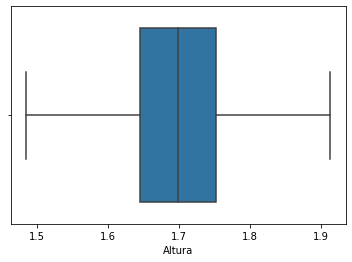

In [70]:
sns.boxplot(
    data = df,
    x = 'Altura',
    showfliers = False
)

# <font color=green>5. Medidas de Dispersão</font>
***

Obtenha a variância e o desvio padrão das variáveis quantitativas do conjunto de dados. Em seguida, utilize o `seaborn` para plotar um gráfico de barras que exiba a média dessas variáveis quantitativas, em função da Unidade Federativa. Com o `seaborn` você também irá conseguir visualizar o desvio padrão da média para cada barra.

In [191]:
variances = {
    'Idade': round(df.Idade.var(), 2),
    'Renda': round(df.Renda.var(), 2),
    'Altura': round(df.Altura.var(), 4)
}

stds = {
    'Idade': round(df.Idade.std(), 2),
    'Renda': round(df.Renda.std(), 2),
    'Altura': round(df.Altura.std(), 4)
}

means = {
    'Idade': round(df.Idade.mean(), 2),
    'Renda': round(df.Renda.mean(), 2),
    'Altura': round(df.Altura.mean(), 4)
}

pd.DataFrame([variances, stds, means], index = ['Variância', 'Desvio padrão', 'Médias'])

,Idade,Renda,Altura
Variância,155.76,11044906.01,0.0064
Desvio padrão,12.48,3323.39,0.0797
Médias,44.07,2000.38,1.6995


In [80]:
ufs = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal',
}

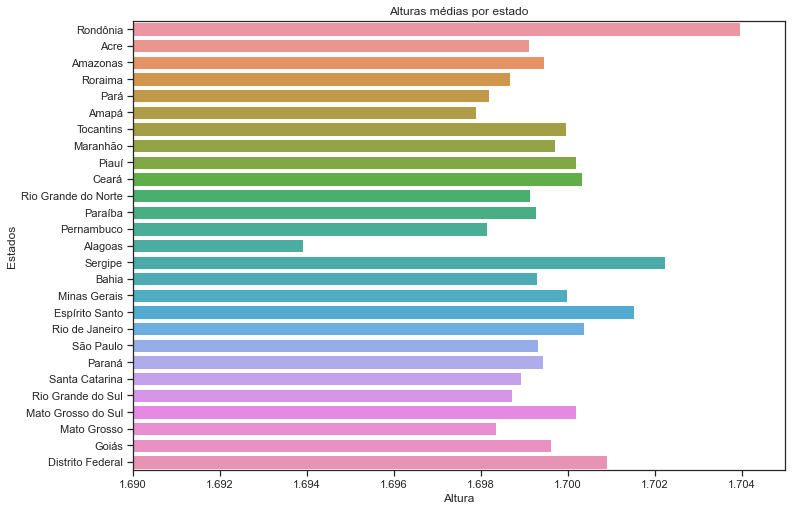

In [159]:
mean_height = df.groupby('UF').Altura.mean()

mean_height = mean_height.reset_index()

mean_height['UF'] = mean_height.apply(
    lambda row: ufs[row['UF']],
    axis = 1
)

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(
    data = mean_height,
    y = 'UF',
    x = 'Altura'
)

xmin = 1.69

xmax = 1.705

ax.set_xticks(np.arange(xmin, xmax + 0.001, 0.002))

ax.set_xlim(
    xmin = xmin,
    xmax = xmax
)

ax.set_title('Alturas médias por estado')
             
ax.set_ylabel('Estados')

plt.show()

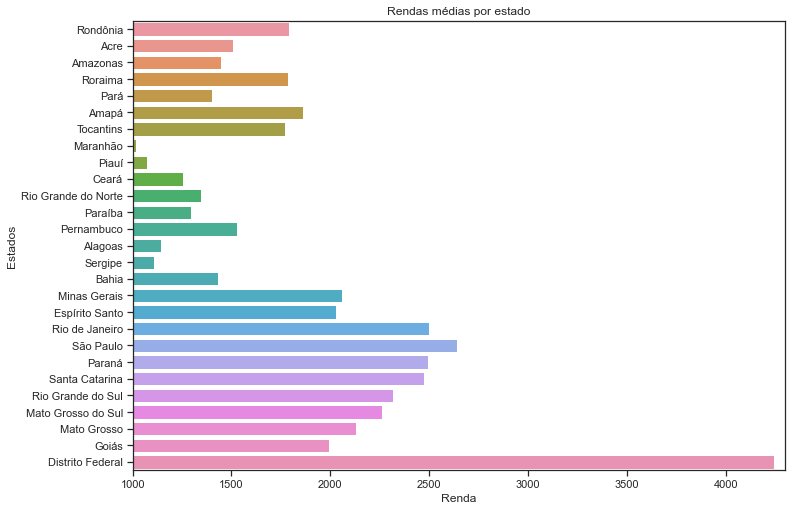

In [167]:
mean_income = df.groupby('UF').Renda.mean()

mean_income = mean_income.reset_index()

mean_income['UF'] = mean_income.apply(
    lambda row: ufs[row['UF']],
    axis = 1
)

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(
    data = mean_income,
    y = 'UF',
    x = 'Renda'
)

xmin = 1000

xmax = 4300

step = 500

ax.set_xticks(np.arange(xmin, xmax + 0.001, step))

ax.set_xlim(
    xmin = xmin,
    xmax = xmax
)

ax.set_title('Rendas médias por estado')
             
ax.set_ylabel('Estados')

plt.show()

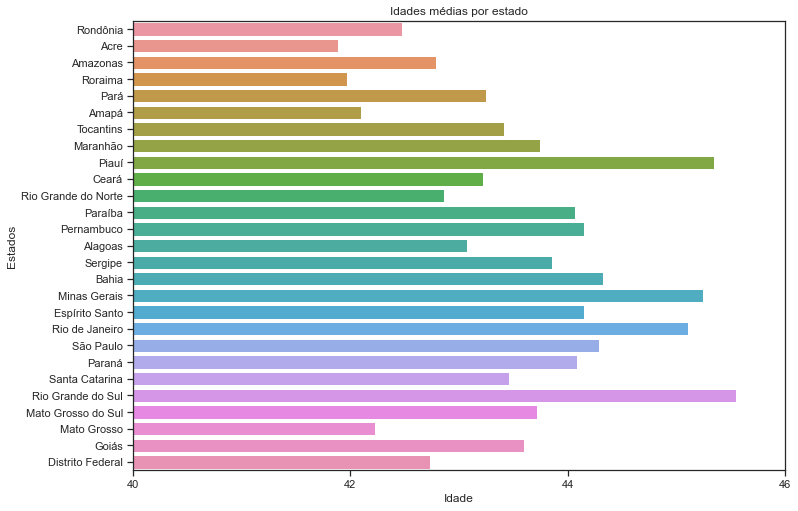

In [171]:
mean_age = df.groupby('UF').Idade.mean()

mean_age = mean_age.reset_index()

mean_age['UF'] = mean_age.apply(
    lambda row: ufs[row['UF']],
    axis = 1
)

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(
    data = mean_age,
    y = 'UF',
    x = 'Idade'
)

xmin = 40

xmax = 46

step = 2

ax.set_xticks(np.arange(xmin, xmax + 0.001, step))

ax.set_xlim(
    xmin = xmin,
    xmax = xmax
)

ax.set_title('Idades médias por estado')
             
ax.set_ylabel('Estados')

plt.show()